# Goal of the Competition

The goal of this competition is to predict MDS-UPDR scores, which measure progression in patients with Parkinson's disease. The Movement Disorder Society-Sponsored Revision of the Unified Parkinson's Disease Rating Scale (MDS-UPDRS) is a comprehensive assessment of both motor and non-motor symptoms associated with Parkinson's. You will develop a model trained on data of protein and peptide levels over time in subjects with Parkinson’s disease versus normal age-matched control subjects.

Your work could help provide important breakthrough information about which molecules change as Parkinson’s disease progresses.



# Context


Parkinson’s disease (PD) is a disabling brain disorder that affects movements, cognition, sleep, and other normal functions. Unfortunately, there is no current cure—and the disease worsens over time. It's estimated that by 2037, 1.6 million people in the U.S. will have Parkinson’s disease, at an economic cost approaching $80 billion. Research indicates that protein or peptide abnormalities play a key role in the onset and worsening of this disease. Gaining a better understanding of this—with the help of data science—could provide important clues for the development of new pharmacotherapies to slow the progression or cure Parkinson’s disease.

Current efforts have resulted in complex clinical and neurobiological data on over 10,000 subjects for broad sharing with the research community. A number of important findings have been published using this data, but clear biomarkers or cures are still lacking.

Competition host, the Accelerating Medicines Partnership® Parkinson’s Disease (AMP®PD), is a public-private partnership between government, industry, and nonprofits that is managed through the Foundation of the National Institutes of Health (FNIH). The Partnership created the AMP PD Knowledge Platform, which includes a deep molecular characterization and longitudinal clinical profiling of Parkinson’s disease patients, with the goal of identifying and validating diagnostic, prognostic, and/or disease progression biomarkers for Parkinson’s disease.

Your work could help in the search for a cure for Parkinson’s disease, which would alleviate the substantial suffering and medical care costs of patients with this disease.

# Project Structure

1. **Data collection** : Gather data on protein and peptide levels over time in subjects with Parkinson’s disease versus normal age-matched control subjects from the AMP PD Knowledge Platform.

2. **Data preprocessing**: Preprocess the data to handle any missing values, outliers, or inconsistencies. This might involve techniques such as imputation, normalization, and feature scaling.

3. **Feature engineering**: Extract relevant features from the data that could help predict MDS-UPDR scores. This might involve techniques such as principal component analysis, feature selection, and feature transformation.

4. **Model selection**: Choose appropriate models that could accurately predict MDS-UPDR scores. This might involve techniques such as linear regression, decision trees, random forests, or neural networks.

5. **Model training**: Train the chosen models on the preprocessed data, using techniques such as cross-validation to optimize hyperparameters and avoid overfitting.

6. **Model evaluation**: Evaluate the performance of the trained models on a separate test set, using metrics such as mean squared error, mean absolute error, or R-squared.

7. **Model interpretation**: Interpret the trained models to gain insights into the relationship between protein and peptide levels and MDS-UPDR scores. This might involve techniques such as feature importance analysis or partial dependence plots.


# Import Libraries

In [1]:
import os
os.environ['APPDATA'] = ""

In [2]:
import pandas as pd
import pandasgui

This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.


In [3]:
pd.options.display.max_columns=100

# Data collection

In [4]:
## get data path
DATA_PATH = '/Users/ziadNader/Desktop/Personal Projects/amp-parkinsons-disease-progression-prediction/data/'

In [5]:
train_peptides = pd.read_csv(DATA_PATH + 'train_peptides.csv')
train_clinical_data = pd.read_csv(DATA_PATH + 'train_clinical_data.csv')
train_proteins = pd.read_csv(DATA_PATH + 'train_proteins.csv')
supplemental_clinical_data = pd.read_csv(DATA_PATH + 'supplemental_clinical_data.csv')

# Data Exploration

## Example of Pandas GUI

In [6]:
#pandasgui.show(train_peptides, train_clinical_data)

In [7]:
train_peptides.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5
6,55_0,0,55,O00533,VIAVNEVGR,170878.0
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.0
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.1
9,55_0,0,55,O00584,ELDLNSVLLK,27229.3


In [8]:
train_peptides[train_peptides['Peptide'].str.contains('UAY')]

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance


In [9]:
train_peptides.shape

(981834, 6)

In [10]:
train_peptides.visit_id.nunique()

1113

In [11]:
train_peptides.UniProt.nunique()

227

In [12]:
train_proteins.head(20)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.30
1,55_0,0,55,O00533,732430.00
2,55_0,0,55,O00584,39585.80
3,55_0,0,55,O14498,41526.90
4,55_0,0,55,O14773,31238.00
5,55_0,0,55,O14791,4202.71
6,55_0,0,55,O15240,177775.00
7,55_0,0,55,O15394,62898.20
8,55_0,0,55,O43505,333376.00
9,55_0,0,55,O60888,166850.00


In [13]:
train_proteins.shape

(232741, 5)

In [14]:
train_proteins.visit_id.nunique()

1113

In [15]:
train_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [16]:
train_clinical_data.shape

(2615, 8)

In [17]:
train_clinical_data[train_clinical_data['patient_id']==75]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication


In [18]:
train_clinical_data.visit_id.nunique()

2615

In [19]:
supplemental_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [20]:
supplemental_clinical_data.shape

(2223, 8)

In [21]:
supplemental_clinical_data.visit_id.nunique()

2223

In [22]:
#pd.merge(train_clinical_data, supplemental_clinical_data, on=['visit_id', 'patient_id', 'visit_month'])

In [23]:
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [24]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [25]:
train_peptides.groupby('visit_id').count().max()

visit_month         947
patient_id          947
UniProt             947
Peptide             947
PeptideAbundance    947
dtype: int64

In [26]:
train_peptides.groupby('visit_id').count().mean()

visit_month         882.150943
patient_id          882.150943
UniProt             882.150943
Peptide             882.150943
PeptideAbundance    882.150943
dtype: float64

In [27]:
train_peptides.groupby('visit_id').count().min()

visit_month         94
patient_id          94
UniProt             94
Peptide             94
PeptideAbundance    94
dtype: int64

<Axes: xlabel='visit_id'>

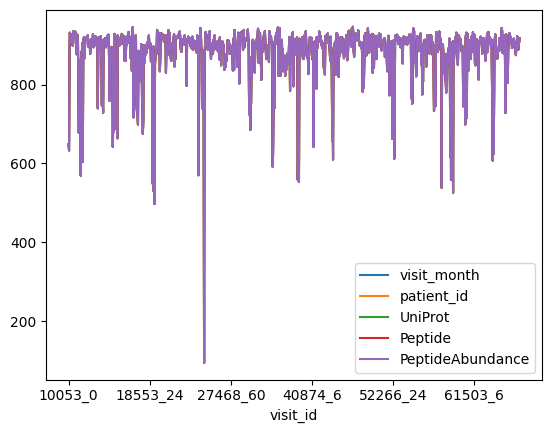

In [28]:
train_peptides.groupby('visit_id').count().plot()

# Prepare a dataset that will help in the train/test

In [47]:
test_peptide = pd.read_csv('/Users/ziadNader/Desktop/Personal Projects/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv')
test_protein = pd.read_csv('/Users/ziadNader/Desktop/Personal Projects/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv')
test_data = pd.read_csv('/Users/ziadNader/Desktop/Personal Projects/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [68]:
test_peptide.patient_id.nunique()

2

In [48]:
test_protein

,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.90,0
1,50423_0,0,50423,O00533,490742.00,0
2,50423_0,0,50423,O00584,43615.30,0
3,50423_0,0,50423,O14773,16486.60,0
4,50423_0,0,50423,O14791,2882.42,0
...,...,...,...,...,...,...
448,3342_6,6,3342,Q9UHG2,325226.00,6
449,3342_6,6,3342,Q9UKV8,64411.50,6
450,3342_6,6,3342,Q9UNU6,25117.50,6
451,3342_6,6,3342,Q9Y646,51473.30,6


In [50]:
test_data

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
5,50423_0,0,50423,updrs_2,50423_0_updrs_2,0
6,50423_0,0,50423,updrs_3,50423_0_updrs_3,0
7,50423_0,0,50423,updrs_4,50423_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6


## Example of submission 

* Subset of prediction: 
{patient_id}_{subset of [0, 6, 12, 18, 24 , 36, 48, 60, 72, 84]}_{updrs_[1, 2, 3, 4]}_{plus_[0, 6, 12, 24]_months}

In [37]:
submission = pd.read_csv('/Users/ziadNader/Desktop/Personal Projects/amp-parkinsons-disease-progression-prediction/example_test_files/submission.csv')

In [39]:
submission.shape

(64, 2)

In [46]:
submission

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.110559
1,3342_0_updrs_1_plus_6_months,7.110559
2,3342_0_updrs_1_plus_12_months,7.110559
3,3342_0_updrs_1_plus_24_months,7.110559
4,3342_0_updrs_2_plus_0_months,6.743590
...,...,...
59,50423_6_updrs_3_plus_24_months,19.421236
60,50423_6_updrs_4_plus_0_months,1.861763
61,50423_6_updrs_4_plus_6_months,1.861763
62,50423_6_updrs_4_plus_12_months,1.861763


In [33]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [35]:
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


## Build Dataset

Steps in order to check after:
    
* Peptide and proteins to look for in the table and mapping 
* train peptides/ proteins in the check to look the max , mean top and maybe get the families 
* check for trend and other types

In [52]:
train_clinical_data[train_clinical_data['patient_id']==55]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


In [53]:
train_clinical_data[train_clinical_data['patient_id']==58648]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
2376,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN
2377,58648_12,58648,12,6.0,0.0,0.0,NaN,NaN
2378,58648_24,58648,24,6.0,0.0,0.0,NaN,NaN
2379,58648_36,58648,36,6.0,0.0,0.0,NaN,NaN
2380,58648_48,58648,48,7.0,0.0,0.0,NaN,NaN
2381,58648_60,58648,60,5.0,0.0,0.0,NaN,NaN
2382,58648_84,58648,84,7.0,0.0,6.0,NaN,NaN
2383,58648_96,58648,96,7.0,0.0,5.0,NaN,NaN
2384,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN


In [66]:
train_peptides[train_peptides['patient_id']==58648]

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
152772,58648_0,0,58648,O00533,IEIPSSVQQVPTIIK,100029.00
152773,58648_0,0,58648,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,24852.10
152774,58648_0,0,58648,O00533,SMEQNGPGLEYR,4128.58
152775,58648_0,0,58648,O00533,VNGSPVDNHPFAGDVVFPR,41924.30
152776,58648_0,0,58648,O00584,ELDLNSVLLK,9965.06
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


Remarks:
    
* Not all months are represented in the dataset
* Sometimes the delta is of 3, 6, 9 or 12 months

<Axes: ylabel='Frequency'>

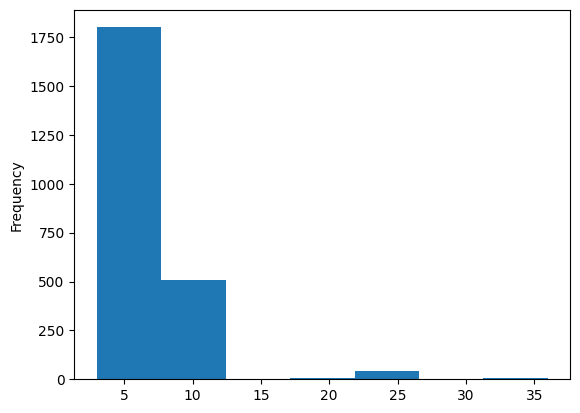

In [65]:
train_clinical_data.groupby('patient_id')['visit_month'].diff().reset_index(drop=True).plot(kind='hist', bins=7);

In [61]:
train_clinical_data.groupby('patient_id')['visit_month'].diff().unique()

array([nan,  3.,  6., 12., 24., 36., 18., 30., 15.])

## merge proteins and train data

In [69]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [73]:
train_first_merge = pd.merge(train_clinical_data, train_proteins, on=['visit_id', 'visit_month', 'patient_id'])

In [74]:
train_first_merge

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00391,11254.3
1,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0
2,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00584,39585.8
3,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14498,41526.9
4,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14773,31238.0
...,...,...,...,...,...,...,...,...,...,...
223263,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UBX5,48796.4
223264,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UHG2,320821.0
223265,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UKV8,39046.7
223266,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9Y646,20198.8


In [75]:
train_first_merge[train_first_merge['patient_id']==58648]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
200594,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,O00533,170934.00
200595,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,O00584,9965.06
200596,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,O14498,38342.70
200597,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,O14773,16825.70
200598,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,O14791,5538.58
...,...,...,...,...,...,...,...,...,...,...
202111,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN,Q9UBX5,27387.80
202112,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN,Q9UHG2,369437.00
202113,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN,Q9UKV8,105830.00
202114,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN,Q9Y646,21257.60


In [77]:
train_first_merge[(train_first_merge['patient_id']==58648) & (train_first_merge['UniProt']=='Q9UBX5')]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
200753,58648_0,58648,0,8.0,0.0,0.0,NaN,NaN,Q9UBX5,13237.5
200913,58648_12,58648,12,6.0,0.0,0.0,NaN,NaN,Q9UBX5,17670.6
201121,58648_36,58648,36,6.0,0.0,0.0,NaN,NaN,Q9UBX5,29149.3
201331,58648_48,58648,48,7.0,0.0,0.0,NaN,NaN,Q9UBX5,17714.5
201533,58648_60,58648,60,5.0,0.0,0.0,NaN,NaN,Q9UBX5,17441.6
201899,58648_96,58648,96,7.0,0.0,5.0,NaN,NaN,Q9UBX5,25472.6
202111,58648_108,58648,108,6.0,0.0,0.0,NaN,NaN,Q9UBX5,27387.8


In [78]:
train_first_merge[(train_first_merge['patient_id']==55) & (train_first_merge['UniProt']=='Q9UBX5')]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
214,55_0,55,0,10.0,6.0,15.0,NaN,NaN,Q9UBX5,60912.6
432,55_6,55,6,8.0,10.0,34.0,NaN,NaN,Q9UBX5,51655.8
653,55_12,55,12,10.0,10.0,41.0,0.0,On,Q9UBX5,61598.2
877,55_36,55,36,17.0,18.0,51.0,0.0,On,Q9UBX5,70223.5


In [79]:
train_clinical_data[train_clinical_data['patient_id']==55]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


In [82]:
train_proteins['UniProt'].nunique()

227

In [84]:
train_peptides['Peptide'].nunique()

968

In [86]:
train_first_merge

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00391,11254.3
1,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0
2,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00584,39585.8
3,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14498,41526.9
4,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O14773,31238.0
...,...,...,...,...,...,...,...,...,...,...
223263,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UBX5,48796.4
223264,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UHG2,320821.0
223265,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UKV8,39046.7
223266,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9Y646,20198.8


In [87]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [90]:
train_second_merge = pd.merge(train_first_merge, train_peptides, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])

In [91]:
train_second_merge 

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00391,11254.3,NEQEQPLGQWHLS,11254.3
1,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0,GNPEPTFSWTK,102060.0
2,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0
3,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,55,0,10.0,6.0,15.0,NaN,NaN,O00533,732430.0,SMEQNGPGLEYR,30838.7
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UHG2,320821.0,ILAGSADSEGVAAPR,185566.0
941740,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9UKV8,39046.7,SGNIPAGTTVDTK,39046.7
941741,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9Y646,20198.8,LALLVDTVGPR,20198.8
941742,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,Q9Y6R7,39535.0,AGC(UniMod_4)VAESTAVC(UniMod_4)R,11124.1
